<a href="https://colab.research.google.com/github/ArthurLazdin/Left-Right-Side-Titanic-Cabins/blob/main/First_Titanic_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
for dirname, _, filenames in os.walk('/content/drive/My Drive/Colab Notebooks/Machine Learning/Data'):
    for filename in filenames: 
        print(os.path.join(dirname, filename))

/content/drive/My Drive/Colab Notebooks/Machine Learning/Data/wine-clustering.csv
/content/drive/My Drive/Colab Notebooks/Machine Learning/Data/titanic_data.csv
/content/drive/My Drive/Colab Notebooks/Machine Learning/Data/train.csv
/content/drive/My Drive/Colab Notebooks/Machine Learning/Data/test.csv
/content/drive/My Drive/Colab Notebooks/Machine Learning/Data/tested.csv


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
titanic_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine Learning/Data/test.csv')
titanic_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine Learning/Data/train.csv')


In [ ]:
titanic_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [ ]:
titanic_cabins = titanic_train.loc[:,['Survived','Cabin']]
titanic_cabins

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN
...,...,...
886,0,NaN
887,1,B42
888,0,NaN
889,1,C148


In [ ]:
titanic_cabins_info = titanic_cabins.dropna(how='any')
titanic_cabins_info

,Survived,Cabin
1,1,C85
3,1,C123
6,0,E46
10,1,G6
11,1,C103
...,...,...
871,1,D35
872,0,B51 B53 B55
879,1,C50
887,1,B42


In [ ]:
left_or_right = []
error_cabin_number = 0
for cabin in titanic_cabins_info['Cabin']:
  if len(cabin) > 4:
    print(cabin)
  if cabin[-1].isdigit():
    if int(cabin[-1]) % 2 == 1:
      left_or_right.append(1)
    else:
      left_or_right.append(0)
  else:
    error_cabin_number += 1
    print(cabin)
    left_or_right.append(0)

print(len(left_or_right))
print(error_cabin_number)
lr_out = np.array(left_or_right)
lr_out


C23 C25 C27
F G73
C23 C25 C27
D10 D12
B58 B60
F E69
D
C22 C26
B58 B60
C22 C26
B57 B59 B63 B66
D
T
C23 C25 C27
B96 B98
B96 B98
C23 C25 C27
D
C22 C26
B51 B53 B55
F G63
C62 C64
F G73
B57 B59 B63 B66
B96 B98
B82 B84
B96 B98
B51 B53 B55
204
4


array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0])

In [ ]:
titanic_cabins_info['Side'] = lr_out
titanic_cabins_info

<ipython-input-34-c992f5f86e41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_cabins_info['Side'] = lr_out


,Survived,Cabin,Side
1,1,C85,1
3,1,C123,1
6,0,E46,0
10,1,G6,0
11,1,C103,1
...,...,...,...
871,1,D35,1
872,0,B51 B53 B55,1
879,1,C50,0
887,1,B42,0


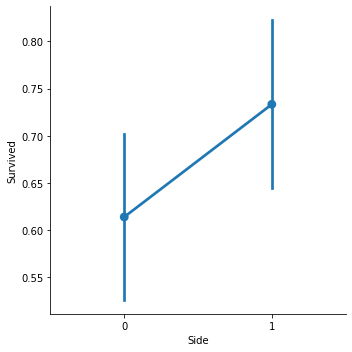

In [ ]:
sns.catplot(x='Side', y='Survived', data=titanic_cabins_info, kind='point' , aspect=1)